In [1]:
import requests
from urllib.parse import urlparse
from io import BytesIO
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt

In [2]:
def show_image_in_cell(face_url):
    response = requests.get(face_url)
    img = Image.open(BytesIO(response.content))
    plt.figure(figsize=(20,10))
    plt.imshow(img)
    plt.show()

In [3]:
from azure.cognitiveservices.vision.customvision.training import CustomVisionTrainingClient
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from azure.cognitiveservices.vision.customvision.training.models import ImageFileCreateBatch, ImageFileCreateEntry, Region
from msrest.authentication import ApiKeyCredentials
import os, time, uuid

In [4]:
PREDICTION_ENDPOINT = 'https://trongcustomvision-prediction.cognitiveservices.azure.com/'
prediction_key = "c98f4bdc48ec4fb4b0261ce52be3b9c5"
prediction_resource_id = "/subscriptions/9bebc9d8-a0ab-4a5c-9664-73435259dba0/resourceGroups/trongResourceGroup/providers/Microsoft.CognitiveServices/accounts/trongcustomvision-Prediction"

In [5]:
prediction_credentials = ApiKeyCredentials(in_headers={"Prediction-key": prediction_key})
predictor = CustomVisionPredictionClient(PREDICTION_ENDPOINT, prediction_credentials)

In [6]:
predictor.api_version

'3.1'

In [7]:
project_id = '85539f6a-973c-486b-b87f-8e10135cd7eb'
publish_iteration_name = 'Iteration2'

In [8]:
local_image_path = 'lighter_test_images/'
file_names = ['lighter_test_set_1of5.jpg','lighter_test_set_2of5.jpg', 'lighter_test_set_3of5.jpg', 'lighter_test_set_4of5.jpg', 'lighter_test_set_5of5.jpg']

In [9]:
def perform_prediction(image_file_name):
    with open(os.path.join (local_image_path,  image_file_name), "rb") as image_contents:
        results = predictor.detect_image(project_id, publish_iteration_name, image_contents.read())
        # Display the results.
        for prediction in results.predictions:
            print("\t" + prediction.tag_name +
                  ": {0:.2f}%".format(prediction.probability * 100))

	lighter_test_set_1of5.jpg
	lighter: 51.70%
	lighter: 35.13%
	lighter: 2.35%
	lighter: 2.23%
	lighter: 1.33%
	lighter: 1.33%
	lighter: 1.18%
	lighter_test_set_2of5.jpg
	lighter: 98.42%
	lighter: 2.11%
	lighter: 1.18%
	lighter_test_set_3of5.jpg
	lighter: 86.01%
	lighter: 78.21%
	lighter: 11.71%
	lighter: 1.71%
	lighter: 1.01%
	lighter_test_set_4of5.jpg
	lighter: 42.43%
	lighter: 29.60%
	lighter: 2.30%
	lighter: 1.07%
	lighter_test_set_5of5.jpg
	lighter: 100.00%
	lighter: 94.49%
	lighter: 18.08%
	lighter: 3.46%


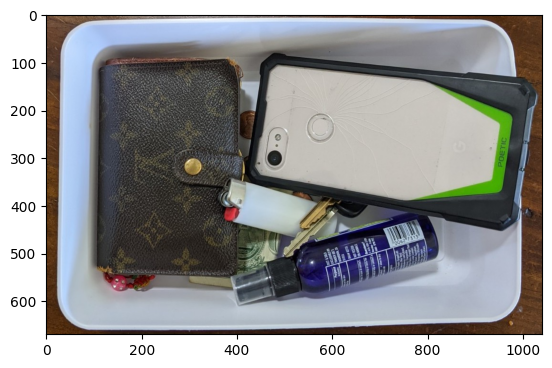

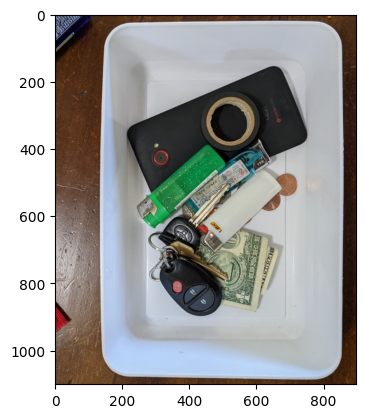

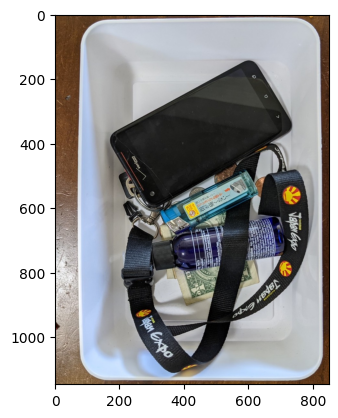

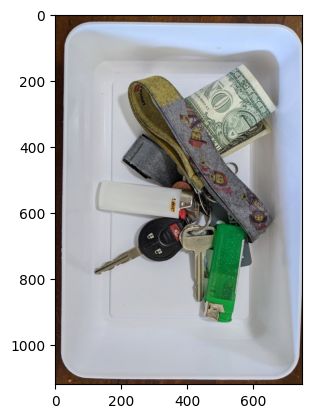

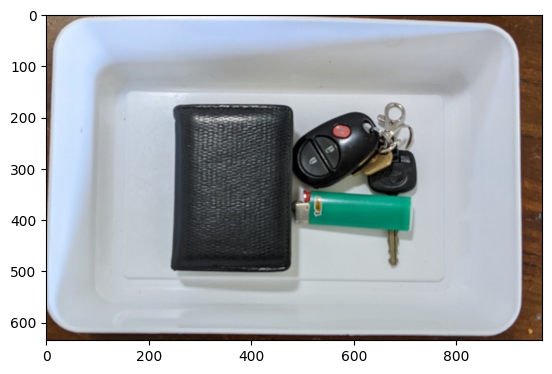

In [14]:
for file_name in file_names:
    print("\t" + file_name )
    perform_prediction(file_name)
    with open(os.path.join (local_image_path, file_name), 'rb') as img_code:
        img_view_ready = Image.open(img_code)
        plt.figure()
        plt.imshow(img_view_ready)

In [11]:
test_image_url = "https://raw.githubusercontent.com/trongvanphan/Automated-Passenger-Boarding-Kiosk/main/Step%204%20-%20Object%20Detection/lighter_test_images/lighter_test_set_3of5.jpg"

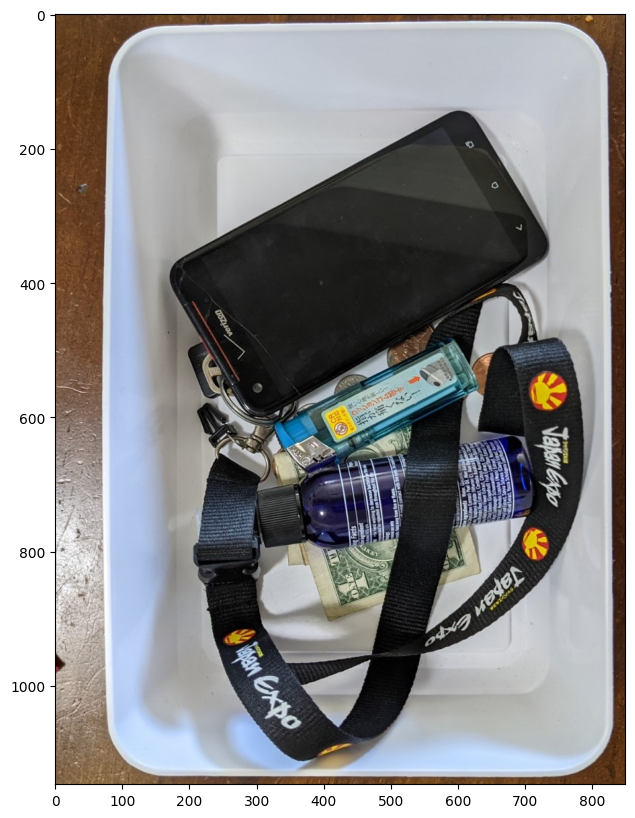

In [12]:
show_image_in_cell(test_image_url)

In [13]:
results = predictor.detect_image_url(project_id,publish_iteration_name,url=test_image_url)
# Display the results.
for prediction in results.predictions:
    print("\t" + prediction.tag_name +
            ": {0:.2f}%".format(prediction.probability * 100))

	lighter: 86.01%
	lighter: 78.21%
	lighter: 11.71%
	lighter: 1.71%
	lighter: 1.01%
